## &#x1F310; &nbsp; Code Library, Style, and Links

Version in `R`:

&#x1F4D8; &nbsp; [kaggle_passnyc_R.ipynb](https://github.com/OlgaBelitskaya/kaggle_notebooks/blob/master/kaggle_passnyc_R.ipynb)

Useful `LINKS`:

&#x1F4E1; &nbsp; [School Quality Reports. Educator Guide](http://schools.nyc.gov/NR/rdonlyres/967E0EE1-7E5D-4E47-BC21-573FEEE23AE2/0/201516EducatorGuideHS9252017.pdf)

&#x1F4E1; &nbsp; [New York City Department of Education](https://www.schools.nyc.gov)

&#x1F4E1; &nbsp; [NYC OpenData](https://opendata.cityofnewyork.us/)

&#x1F4E1; &nbsp; [Pandas Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

&#x1F4E1; &nbsp; [Pandas Styling](https://pandas.pydata.org/pandas-docs/stable/style.html)

In [160]:
%%html
<style> 
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto');
body {background-color: gainsboro;} 
a {color: #37c9e1; font-family: 'Roboto';} 
h1 {color: #37c9e1; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;} 
h2, h3 {color: slategray; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;}
h4 {color: #818286; font-family: 'Roboto';}
span {text-shadow: 4px 4px 4px #aaa;}
div.output_prompt, div.output_area pre {color: slategray;}
div.input_prompt, div.output_subarea {color: #37c9e1;}      
div.output_stderr pre {background-color: gainsboro;}  
div.output_stderr {background-color: slategrey;}       
</style>

In [161]:
import numpy as np 
import pandas as pd

import matplotlib.pylab as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

In [162]:
style_dict = {'background-color':'slategray',
              'color':'#37c9e1',
              'border-color': 'white',
              'font-family':'Roboto'}

In [163]:
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r',

## &#x1F310; &nbsp; Load the Data

In [164]:
school_explorer = pd.read_csv('2016 School Explorer.csv')
school_explorer.head(3).T[3:41].style.set_properties(**style_dict)

,0,1,2
School Name,P.S. 015 ROBERTO CLEMENTE,P.S. 019 ASHER LEVY,P.S. 020 ANNA SILVER
SED Code,310100010015,310100010019,310100010020
Location Code,01M015,01M019,01M020
District,1,1,1
Latitude,40.7218,40.7299,40.7213
Longitude,-73.9788,-73.9842,-73.9863
Address (Full),"333 E 4TH ST NEW YORK, NY 10009","185 1ST AVE NEW YORK, NY 10003","166 ESSEX ST NEW YORK, NY 10002"
City,NEW YORK,NEW YORK,NEW YORK
Zip,10009,10003,10002
Grades,"PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05"


In [165]:
na_list = ['Adjusted Grade','New?','Other Location Code in LCGMS']
school_explorer = school_explorer.drop(na_list, axis=1)
school_explorer.shape

(1272, 158)

In [166]:
d5_shsat = pd.read_csv('D5 SHSAT Registrations and Testers.csv')
d5_shsat.head().T.style.set_properties(**style_dict)

,0,1,2,3,4
DBN,05M046,05M046,05M046,05M046,05M123
School name,P.S. 046 Arthur Tappan,P.S. 046 Arthur Tappan,P.S. 046 Arthur Tappan,P.S. 046 Arthur Tappan,P.S. 123 Mahalia Jackson
Year of SHST,2013,2014,2015,2016,2013
Grade level,8,8,8,8,8
Enrollment on 10/31,91,95,73,56,62
Number of students who registered for the SHSAT,31,26,21,20,31
Number of students who took the SHSAT,14,7,10,8,14


In [167]:
d5_shsat.shape

(140, 7)

## &#x1F310; &nbsp; Missing Values

In [168]:
school_explorer.isna().sum()[school_explorer.isna().sum() !=0]\
.to_frame().style.set_properties(**style_dict)

,0
Economic Need Index,25
School Income Estimate,396
Student Attendance Rate,25
Percent of Students Chronically Absent,25
Rigorous Instruction %,25
Rigorous Instruction Rating,76
Collaborative Teachers %,25
Collaborative Teachers Rating,76
Supportive Environment %,25
Supportive Environment Rating,80


In [169]:
sum(d5_shsat.isna().sum())

0

## &#x1F310; &nbsp; School Names

In [170]:
school_explorer['School Name'].value_counts()[:5]\
.to_frame().style.set_properties(**style_dict)

,School Name
P.S. 212,2
P.S. 253,2
I.S. 232,1
J.H.S. 054 BOOKER T. WASHINGTON,1
THE ACADEMY OF THE ARTS,1


In [171]:
c1, c2 = school_explorer['School Name'] == 'P.S. 212', school_explorer['School Name'] == 'P.S. 253'
school_explorer[c1 | c2].T[3:10].style.set_properties(**style_dict)

,427,712,908,1023
District,12,21,27,30
Latitude,40.8287,40.5801,40.6073,40.7532
Longitude,-73.9005,-73.9619,-73.7488,-73.8849
Address (Full),"1180 TINTON AVE BRONX, NY 10456","601 OCEANVIEW AVE BROOKLYN, NY 11235","1307 CENTRAL AVE FAR ROCKAWAY, NY 11691","34-25 82ND ST JACKSON HEIGHTS, NY 11372"
City,BRONX,BROOKLYN,FAR ROCKAWAY,JACKSON HEIGHTS
Zip,10456,11235,11691,11372
Grades,"PK,0K,01,02,03,04,05,06,07,08","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05","0K,01,02,03,04,05"


In [172]:
school_explorer.loc[427,'School Name'] = 'P.S. 212 D12'
school_explorer.loc[1023,'School Name'] = 'P.S. 212 D30'
school_explorer.loc[712,'School Name'] = 'P.S. 253 D21'
school_explorer.loc[908,'School Name'] = 'P.S. 253 D27'

len(set(school_explorer['School Name'])) == school_explorer.shape[0]

True

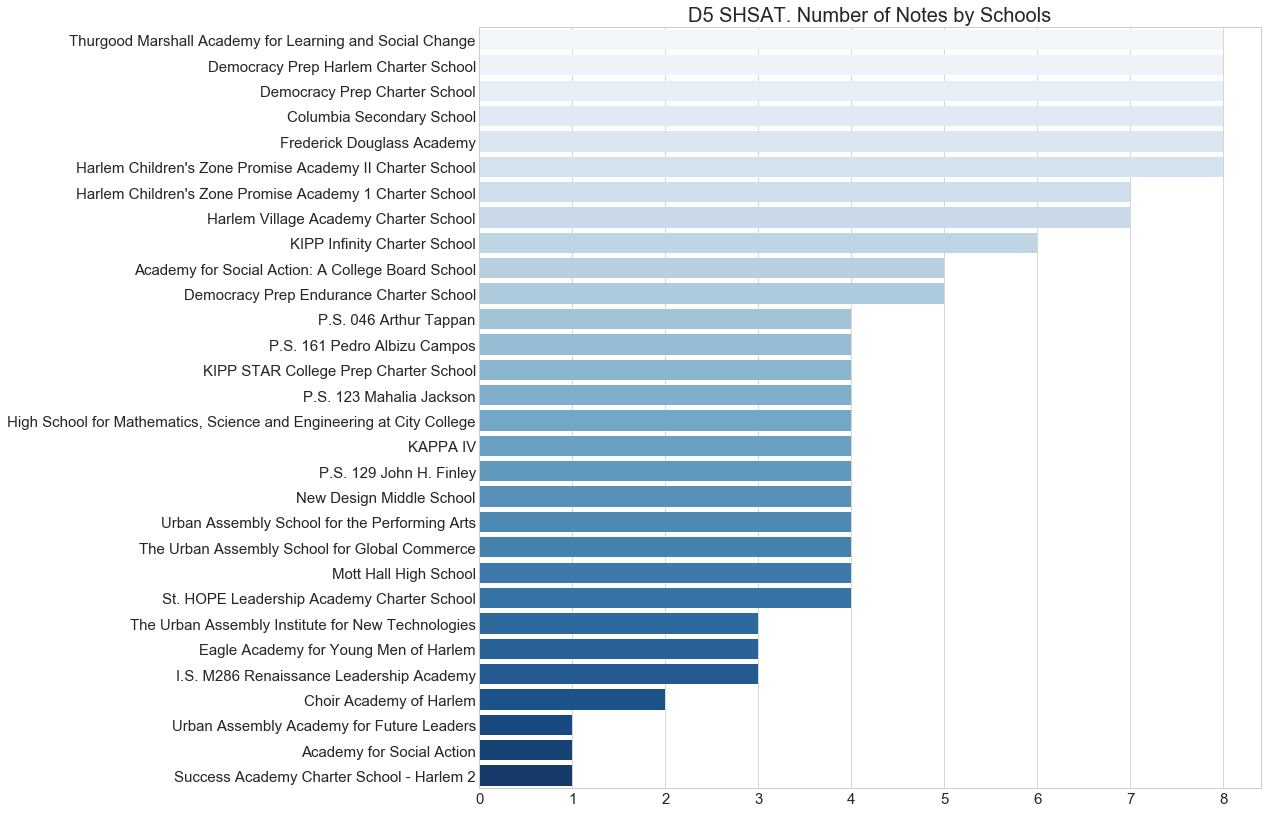

In [173]:
plt.style.use('seaborn-whitegrid')
fig,ax = plt.subplots(1, figsize=(14,14))
sns.countplot(y='School name',data=d5_shsat,palette='Blues',ax=ax,
              order=d5_shsat['School name'].value_counts().index)
ax.tick_params('both',labelsize=15)
ax.set_xlabel(''); ax.set_ylabel('')
plt.title('D5 SHSAT. Number of Notes by Schools',fontsize=20);

## &#x1F310; &nbsp; Preprocess Variables

In [174]:
school_explorer['School Income Estimate'] = school_explorer['School Income Estimate'].astype('str') 
for s in [",","$"," "]:
    school_explorer['School Income Estimate'] = school_explorer['School Income Estimate'].str.replace(s, "")
school_explorer['School Income Estimate'] = school_explorer['School Income Estimate'].str.replace("nan", "0")
school_explorer['School Income Estimate'] = school_explorer['School Income Estimate'].astype(float)
school_explorer['School Income Estimate'].replace(0, np.NaN, inplace=True)

In [175]:
percent_list = ['Percent ELL','Percent Asian','Percent Black',
                'Percent Hispanic','Percent Black / Hispanic',
                'Percent White','Student Attendance Rate',
                'Percent of Students Chronically Absent',
                'Rigorous Instruction %','Collaborative Teachers %',
                'Supportive Environment %','Effective School Leadership %',
                'Strong Family-Community Ties %','Trust %']
target_list = ['Average ELA Proficiency','Average Math Proficiency']
economic_list = ['Economic Need Index','School Income Estimate']
rating_list = ['Rigorous Instruction Rating','Collaborative Teachers Rating',
               'Supportive Environment Rating','Effective School Leadership Rating',
               'Strong Family-Community Ties Rating','Trust Rating',
               'Student Achievement Rating']

In [176]:
for el in percent_list:
    school_explorer[el] = school_explorer[el].astype('str')
    school_explorer[el] = school_explorer[el].str.replace("%", "")
    school_explorer[el] = school_explorer[el].str.replace("nan", "0")
    school_explorer[el] = school_explorer[el].astype(float)
    school_explorer[el].replace(0, np.NaN, inplace=True)
    school_explorer[el] = school_explorer[el].interpolate()
    
for el in target_list+economic_list:
    school_explorer[el] = school_explorer[el].interpolate()
    
for el in rating_list:
    moda_value = school_explorer[el].value_counts().idxmax()
    school_explorer[el] = school_explorer[el].fillna(moda_value)

In [177]:
print('Number of Missing Values: ', sum(school_explorer.isna().sum()))

Number of Missing Values:  0


## &#x1F310; &nbsp; Indicators' Visualisation
Let's try to find the best way of representing each variable.

#### Distribution Plots

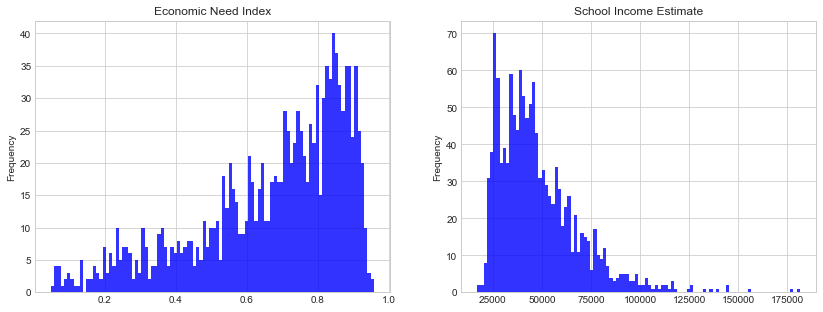

In [178]:
f, ax = plt.subplots(ncols=2,figsize=(14,5))
for i in range(2):
    school_explorer[economic_list[i]]\
    .plot.hist(bins=100,alpha=0.8,cmap=cm.bwr,
               title=economic_list[i],ax=ax[i]);

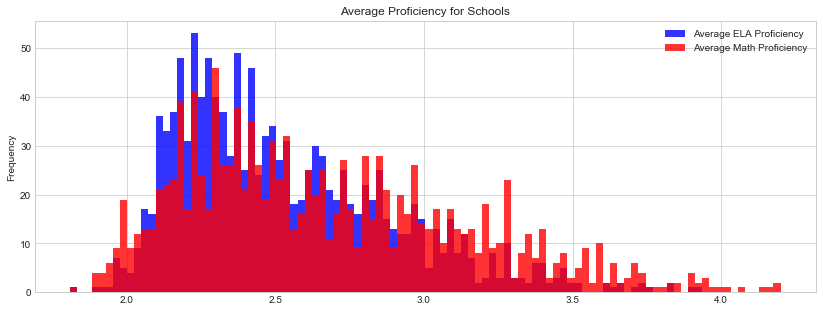

In [179]:
school_explorer[target_list].plot.hist(bins=100,alpha=0.8,figsize=(14,5),cmap=cm.bwr,
                                       title='Average Proficiency for Schools');

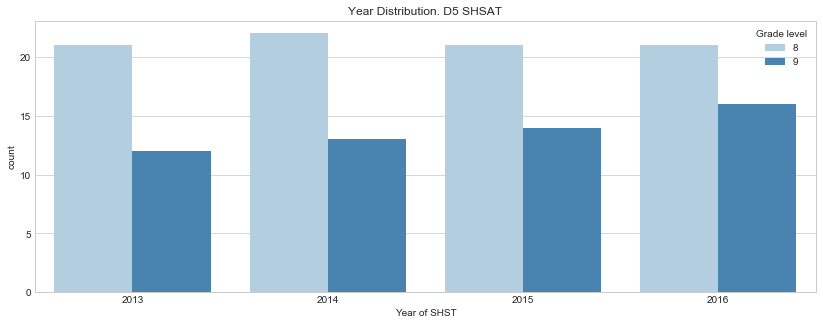

In [180]:
plt.figure(figsize=(14,5))
sns.countplot(x="Year of SHST",hue="Grade level",data=d5_shsat,palette='Blues')
plt.title('Year Distribution. D5 SHSAT', fontsize=12);

#### Area Plots

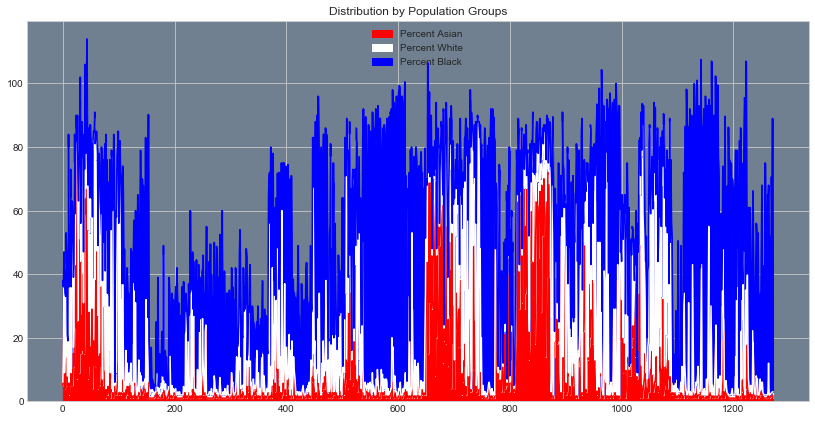

In [181]:
ax = plt.gca()
school_explorer[['Percent Asian','Percent White','Percent Black']]\
.plot.area(figsize=(14,7),cmap=cm.bwr_r,ax=ax,
           title='Distribution by Population Groups')
ax.set_facecolor('slategray');

#### Scatter Plots

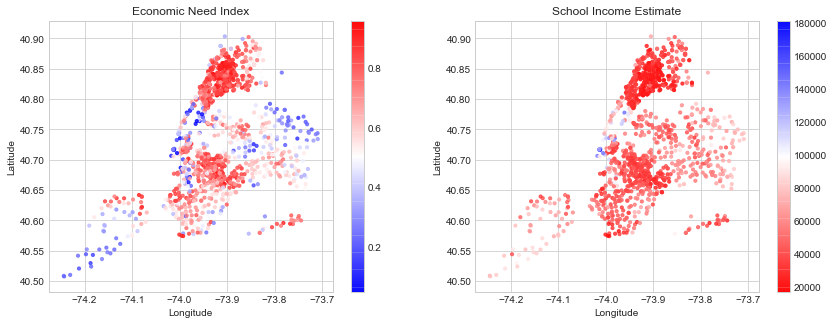

In [182]:
f, ax = plt.subplots(ncols=2,figsize=(14,5))
for i in range(2):
    if i==0:
        c = cm.bwr
    else:
        c = cm.bwr_r
    school_explorer.plot(kind="scatter",x="Longitude", y="Latitude",
                         s=10,c=school_explorer[economic_list[i]], 
                         title=economic_list[i],ax=ax[i],
                         cmap=c,colorbar=True,alpha=0.8);

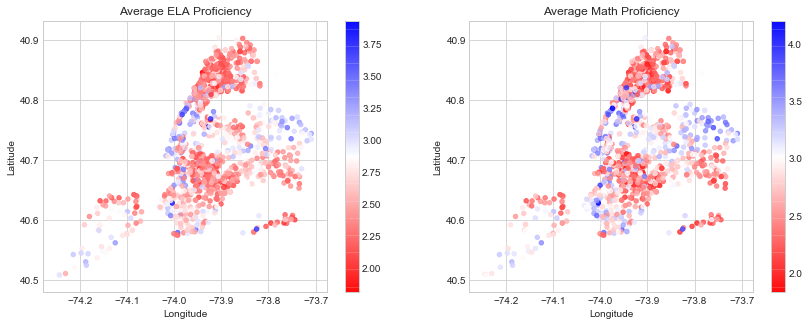

In [183]:
f, ax = plt.subplots(ncols=2,figsize=(14,5))
for i in range(2):
    school_explorer.plot(kind="scatter",x="Longitude", y="Latitude",
                         c=school_explorer[target_list[i]], 
                         title=target_list[i],ax=ax[i],
                         cmap=cm.bwr_r,colorbar=True,alpha=0.8);

Fortunately, economic problems are not correlated with educational results so strongly.

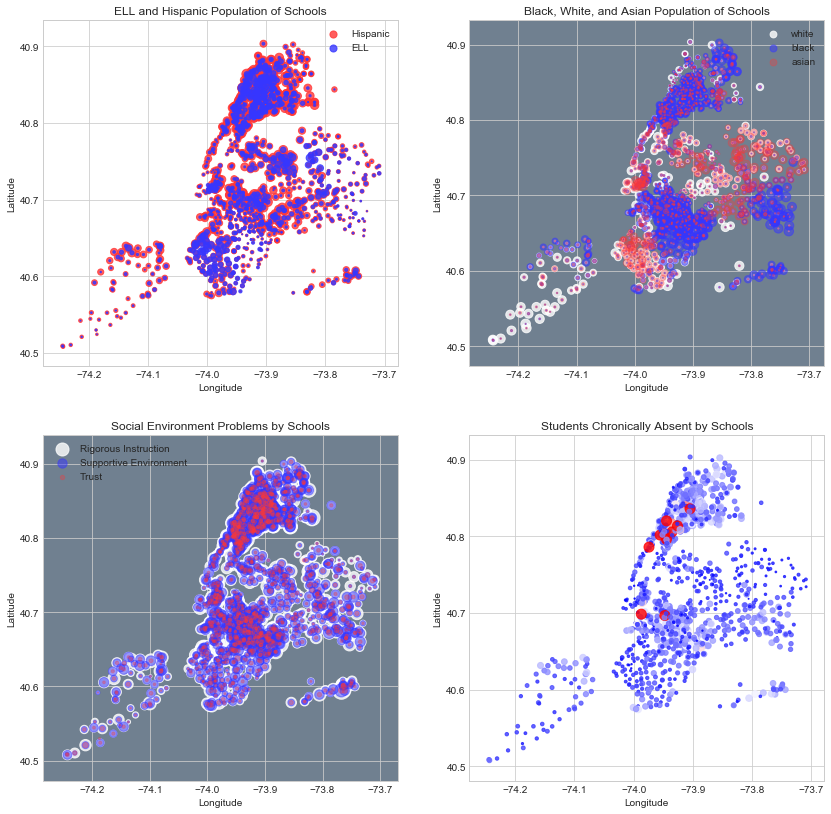

In [184]:
f, axes = plt.subplots(ncols=2, nrows=2, figsize=(14,14))
school_explorer.plot(kind='scatter', x='Longitude', y='Latitude', 
                     alpha=0.8,color='#ff3636', s=school_explorer['Percent Hispanic'],
                     label='Hispanic', ax=axes[0,0])
school_explorer.plot(kind='scatter', x='Longitude', y='Latitude', ax=axes[0,0],
                     alpha=0.8, color='#3636ff', s=school_explorer['Percent ELL'],
                     label='ELL', title='ELL and Hispanic Population of Schools') 

school_explorer.plot(kind='scatter', x='Longitude', y='Latitude', 
                     alpha=0.8, color='white', s=school_explorer['Percent White'],
                     label='white', ax=axes[0,1],
                     title='Black, White, and Asian Population of Schools')    
school_explorer.plot(kind='scatter', x='Longitude', y='Latitude', 
                     alpha=0.5, color='#3636ff', s=school_explorer['Percent Black'],
                     label='black', ax=axes[0,1])    
school_explorer.plot(kind='scatter', x='Longitude', y='Latitude', 
                     alpha=0.3,color='#ff3636', s=school_explorer['Percent Asian'],
                     label='asian', ax=axes[0,1])
axes[0,1].set_facecolor('slategray')

school_explorer.plot(kind='scatter', x='Longitude', y='Latitude', 
                     alpha=0.8, color='white', 
                     s=(100-school_explorer['Rigorous Instruction %'])*10,
                     label='Rigorous Instruction', ax=axes[1,0],
                     title='Social Environment Problems by Schools') 
school_explorer.plot(kind='scatter', x='Longitude', y='Latitude', 
                     alpha=0.5,color='#3636ff', 
                     s=(100-school_explorer['Supportive Environment %'])*5,
                     label='Supportive Environment', ax=axes[1,0])
school_explorer.plot(kind='scatter', x='Longitude', y='Latitude', 
                     alpha=0.3,color='#ff3636', 
                     s=(100-school_explorer['Trust %']),
                     label='Trust', ax=axes[1,0])
axes[1,0].set_facecolor('slategray')

school_explorer.plot(kind="scatter", ax=axes[1,1],
                     x="Longitude", y="Latitude",
                     s=school_explorer['Percent of Students Chronically Absent'],
                     c=school_explorer['Percent of Students Chronically Absent'], 
                     title='Students Chronically Absent by Schools',
                     cmap=cm.bwr,colorbar=False,alpha=0.8);

As it was expected there are some correlation tendencies between economic problems and social environment, discipline, ethnic characteristics.

#### Pie Plots

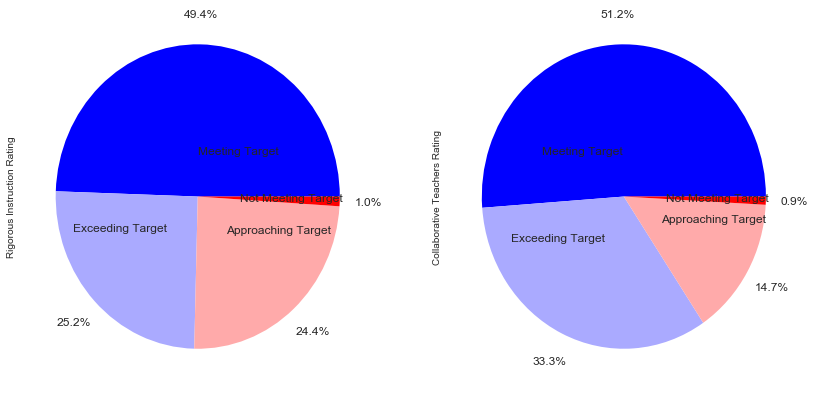

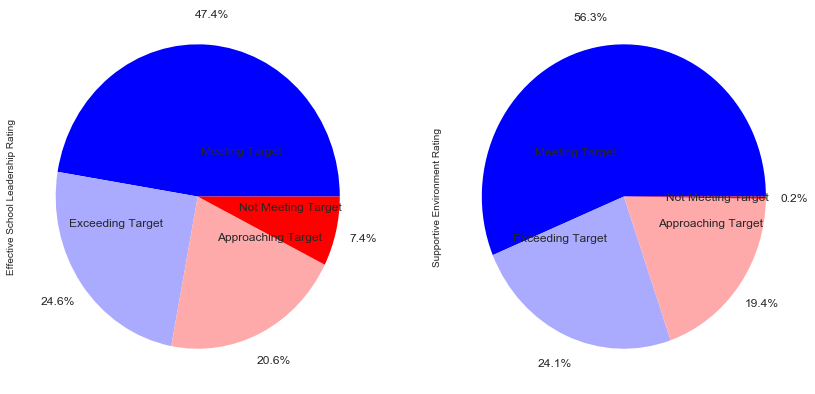

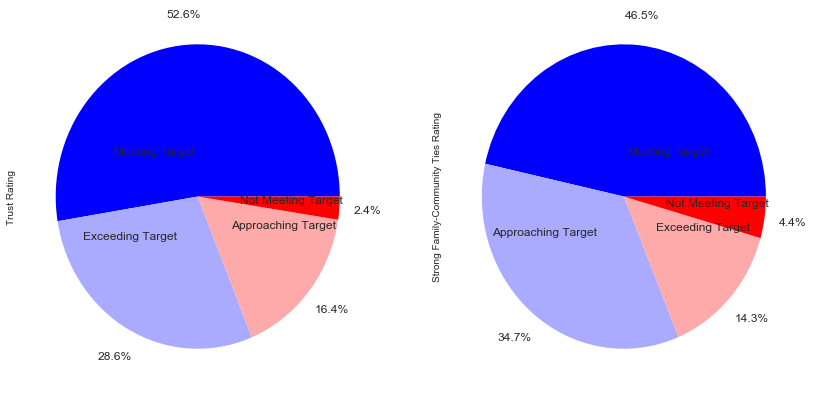

In [185]:
fig,ax = plt.subplots(ncols=2, figsize=(14,7))
for i in range(2):
    school_explorer[rating_list[i]].value_counts()\
    .plot.pie(autopct='%0.1f%%',ax=ax[i],cmap=cm.bwr,
              labeldistance=0.3,pctdistance=1.2,fontsize=12)
    
fig,ax = plt.subplots(ncols=2, figsize=(14,7))
for i in range(2,4):
    school_explorer[rating_list[i]].value_counts()\
    .plot.pie(autopct='%0.1f%%',ax=ax[3-i],cmap=cm.bwr,
              labeldistance=0.3,pctdistance=1.2,fontsize=12)
    
fig,ax = plt.subplots(ncols=2, figsize=(14,7))
for i in range(4,6):
    school_explorer[rating_list[i]].value_counts()\
    .plot.pie(autopct='%0.1f%%',ax=ax[5-i],cmap=cm.bwr,
              labeldistance=0.3,pctdistance=1.2,fontsize=12);

#### Bar PLots

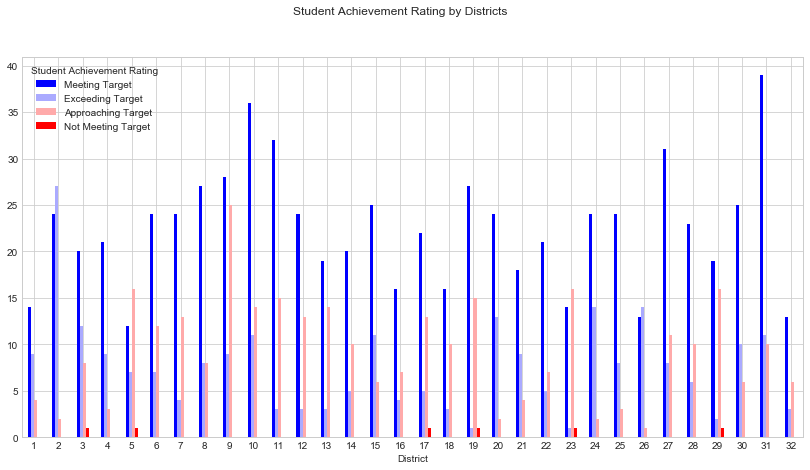

In [186]:
fig,ax = plt.subplots(1, figsize=(14,7))
range_list = ['Meeting Target','Exceeding Target',
              'Approaching Target','Not Meeting Target']
plt.suptitle('Student Achievement Rating by Districts')
pd.crosstab(school_explorer['District'],
            school_explorer['Student Achievement Rating'])\
[range_list].plot.bar(ax=ax,cmap=cm.bwr)
ax.tick_params('x',labelrotation=0);

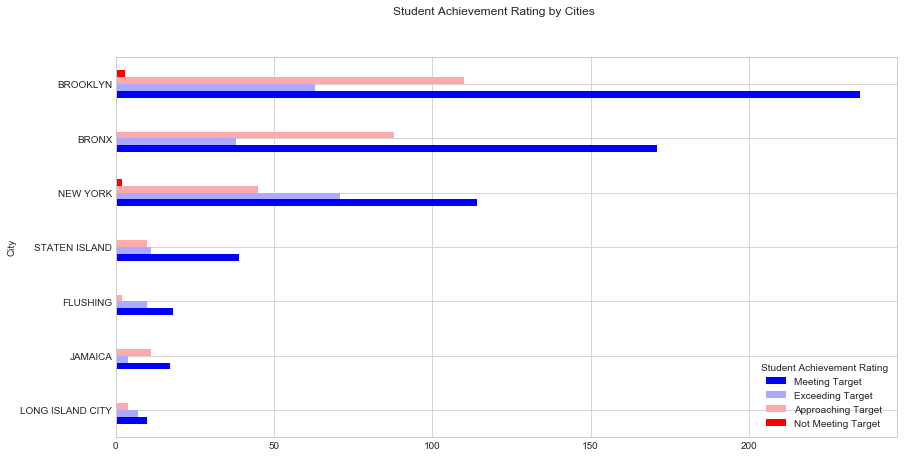

In [187]:
fig,ax = plt.subplots(1, figsize=(14,7))
city_list = ['NEW YORK','BRONX','BROOKLYN',
             'STATEN ISLAND','JAMAICA',
             'FLUSHING','LONG ISLAND CITY']
data = school_explorer.loc[school_explorer['City'].isin(city_list)]
plt.suptitle('Student Achievement Rating by Cities')
pd.crosstab(data['City'],data['Student Achievement Rating'])\
[range_list].sort_values('Meeting Target').plot.barh(ax=ax,cmap=cm.bwr);

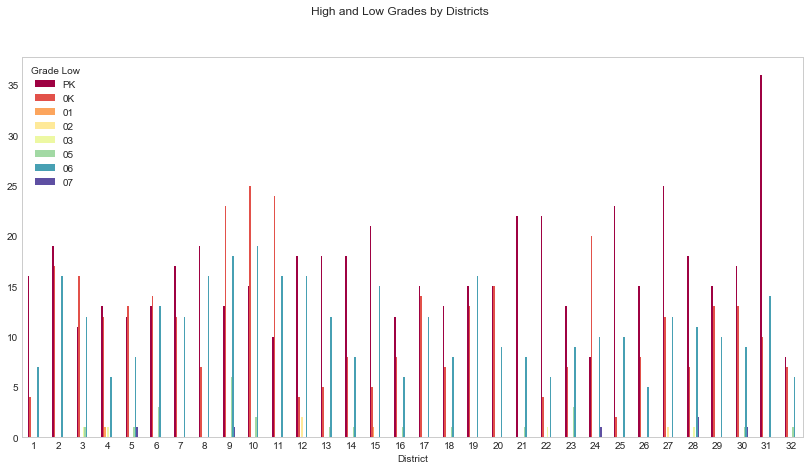

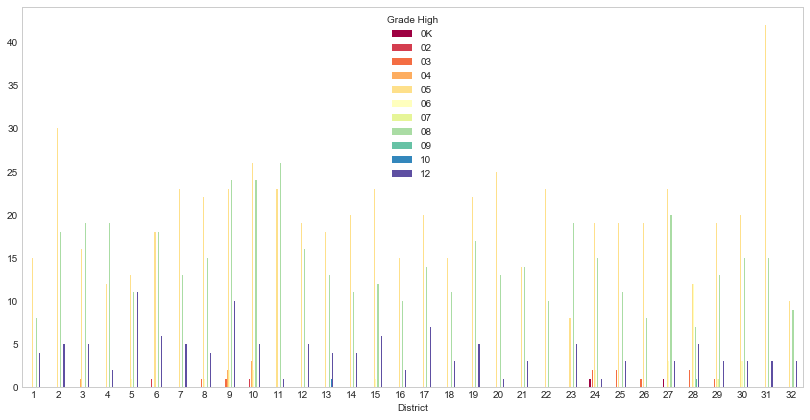

In [188]:
gradelow_list = ['PK','0K','01','02','03','05','06','07']
gradehigh_list = ['0K','02','03','04','05','06','07','08','09','10','12']

fig,ax = plt.subplots(1, figsize=(14,7))
plt.suptitle('High and Low Grades by Districts')
pd.crosstab(school_explorer['District'],
            school_explorer['Grade Low'])[gradelow_list]\
.plot.bar(ax=ax,cmap=cm.Spectral)
ax.grid(color='white')
ax.tick_params('x',labelrotation=0);

fig,ax = plt.subplots(1, figsize=(14,7))
pd.crosstab(school_explorer['District'],
            school_explorer['Grade High'])[gradehigh_list]\
.plot.bar(ax=ax,cmap=cm.Spectral)
ax.grid(color='white')
ax.tick_params('x',labelrotation=0);

In [189]:
g4s_list = ["All Students Tested","All Students 4s",
            "American Indian or Alaska Native 4s",
            "Black or African American 4s",
            "Hispanic or Latino 4s",
            "Asian or Pacific Islander 4s",
            "White 4s","Multiracial 4s",
            "Limited English Proficient 4s",
            "Economically Disadvantaged 4s"]

grades_ela = pd.DataFrame({'3': list(school_explorer.iloc[:,38:48].sum()),
                           '4': list(school_explorer.iloc[:,58:68].sum()),
                           '5': list(school_explorer.iloc[:,78:88].sum()),
                           '6': list(school_explorer.iloc[:,98:108].sum()),
                           '7': list(school_explorer.iloc[:,118:128].sum()),
                           '8': list(school_explorer.iloc[:,138:148].sum())},
                           index=g4s_list)
grades_math = pd.DataFrame({'3': list(school_explorer.iloc[:,48:58].sum()),
                            '4': list(school_explorer.iloc[:,68:78].sum()),
                            '5': list(school_explorer.iloc[:,88:98].sum()),
                            '6': list(school_explorer.iloc[:,108:118].sum()),
                            '7': list(school_explorer.iloc[:,128:138].sum()),
                            '8': list(school_explorer.iloc[:,148:158].sum())},
                           index=g4s_list)

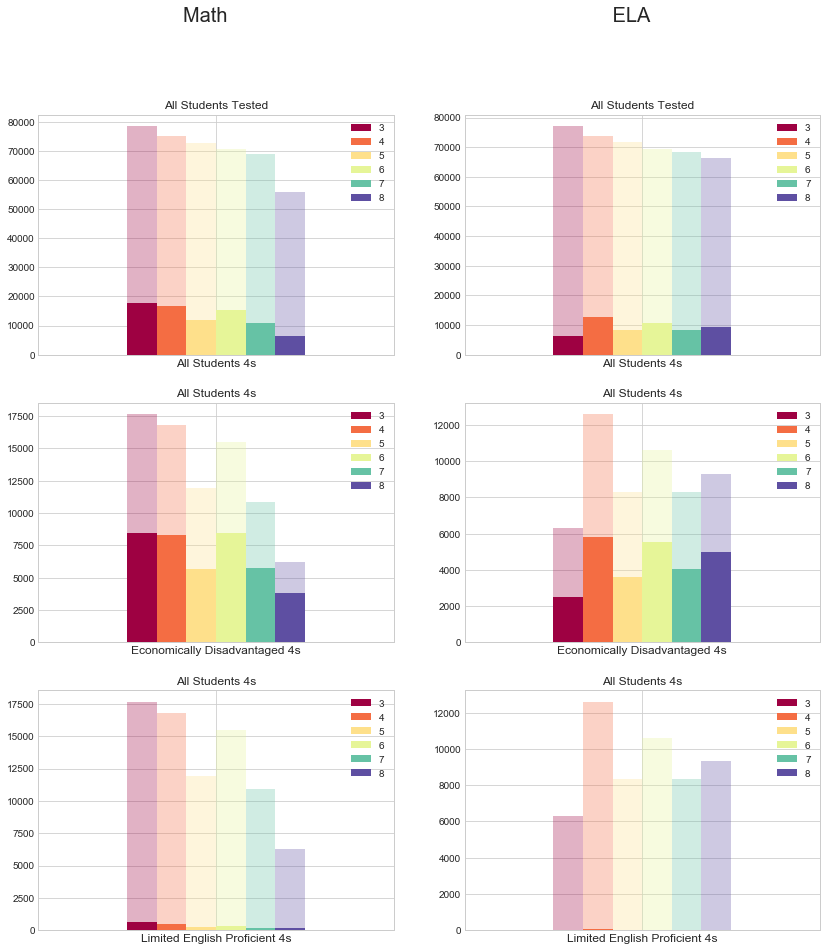

In [190]:
f, ax = plt.subplots(ncols=2, nrows=3, figsize=(14,15))

grades_math[:1].plot.bar(ax=ax[0,0],cmap=cm.Spectral,alpha=0.3,legend=False)
grades_math[1:2].plot.bar(ax=ax[0,0],title='All Students Tested',cmap=cm.Spectral)

grades_ela[:1].plot.bar(ax=ax[0,1],cmap=cm.Spectral,alpha=0.3,legend=False)
grades_ela[1:2].plot.bar(ax=ax[0,1],title='All Students Tested',cmap=cm.Spectral)

grades_math[1:2].plot.bar(ax=ax[1,0],cmap=cm.Spectral,alpha=0.3,legend=False)
grades_math[-1:].plot.bar(ax=ax[1,0],title='All Students 4s',cmap=cm.Spectral)
grades_ela[1:2].plot.bar(ax=ax[1,1],cmap=cm.Spectral,alpha=0.3,legend=False)
grades_ela[-1:].plot.bar(ax=ax[1,1],title='All Students 4s',cmap=cm.Spectral);

grades_math[1:2].plot.bar(ax=ax[2,0],cmap=cm.Spectral,alpha=0.3,legend=False)
grades_math[-2:-1].plot.bar(ax=ax[2,0],title='All Students 4s',cmap=cm.Spectral)
grades_ela[1:2].plot.bar(ax=ax[2,1],cmap=cm.Spectral,alpha=0.3,legend=False)
grades_ela[-2:-1].plot.bar(ax=ax[2,1],title='All Students 4s',cmap=cm.Spectral)

for i in range(3):
    for j in range(2):
        ax[i,j].tick_params('x',rotation=0,labelsize=12)
        
plt.suptitle('Math'+70*' '+'ELA',fontsize=20);

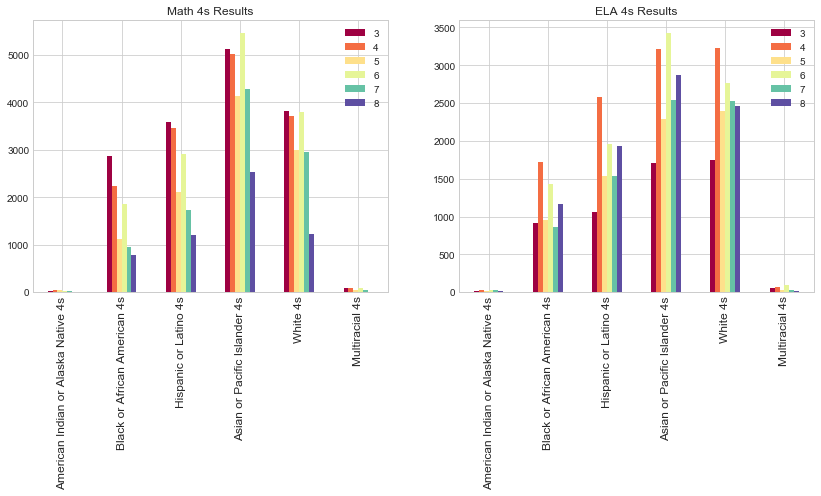

In [195]:
f, ax = plt.subplots(ncols=2, figsize=(14,5))
grades_math[2:-2].plot.bar(ax=ax[0],title='Math 4s Results',cmap=cm.Spectral)
grades_ela[2:-2].plot.bar(ax=ax[1],title='ELA 4s Results',cmap=cm.Spectral)
for i in range(2):
    ax[i].tick_params('x',labelsize=12)

Users could realize immediately that 

- the indicator `Economically Disadvantaged` is not a reason for worse exam scores, and 
- the indicator `Limited English Proficient` affects them really strongly.

It's not a secret that many test texts could have confused meaning so it's important to understand them correctly. 

The same explanation could be applied for understanding this problem in different ethnic groups: 

- worse English speakers have worse results.

So for the successful exam process, it needs to move in two directions: 

- make exam materials more understandable by visualization, 
- improve English knowledge among students as much as it is possible.

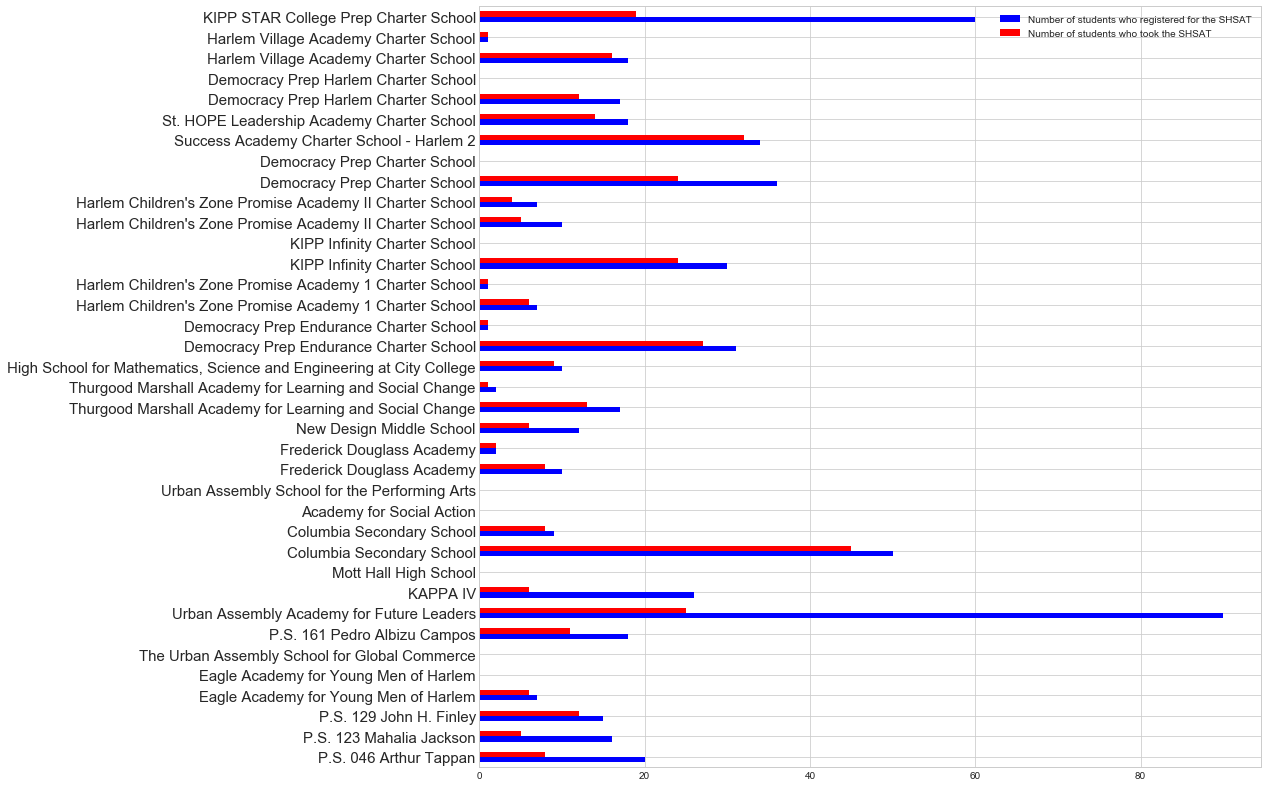

In [192]:
d5_shsat_2016 = \
d5_shsat[['Number of students who registered for the SHSAT',
          'Number of students who took the SHSAT']][d5_shsat['Year of SHST']==2016]
d5_shsat_2016 = \
d5_shsat_2016.set_index(d5_shsat['School name'][d5_shsat['Year of SHST']==2016])

fig,ax = plt.subplots(1, figsize=(14,14))
d5_shsat_2016.plot.barh(ax=ax,cmap=cm.bwr)
ax.set_xlabel(''); ax.set_ylabel('')
ax.tick_params('y',labelsize=15);

## &#x1F310; &nbsp; School Types

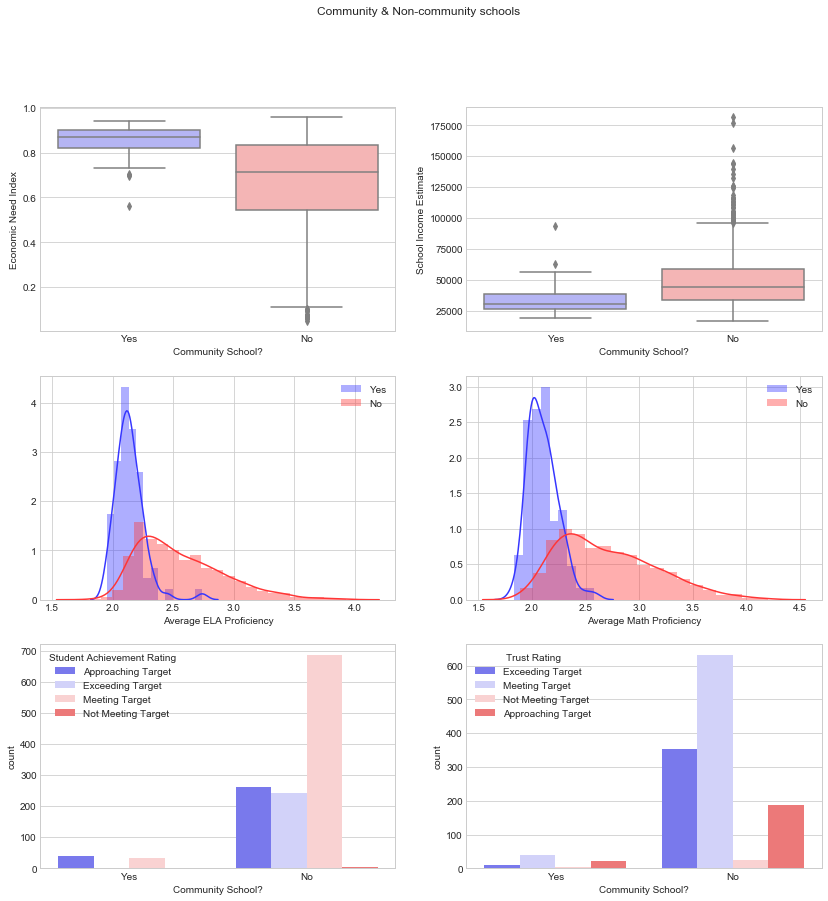

In [193]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

fig,ax = plt.subplots(nrows=3, ncols=2, figsize=(14,14))
plt.suptitle('Community & Non-community schools')

sns.boxplot(x="Community School?",y="Economic Need Index",
            data=school_explorer,ax=ax[0,0],palette='bwr')
sns.boxplot(x="Community School?",y="School Income Estimate",
            data=school_explorer,ax=ax[0,1],palette='bwr')

sns.distplot(school_explorer[target_list[0]][school_explorer['Community School?']=='Yes'],
             ax=ax[1,0],color='#3636ff',label='Yes')
sns.distplot(school_explorer[target_list[0]][school_explorer['Community School?']=='No'],
             ax=ax[1,0],color='#ff3636',label='No')
ax[1,0].legend()

sns.distplot(school_explorer[target_list[1]][school_explorer['Community School?']=='Yes'],
             ax=ax[1,1],color='#3636ff',label='Yes')
sns.distplot(school_explorer[target_list[1]][school_explorer['Community School?']=='No'],
             ax=ax[1,1],color='#ff3636',label='No')
ax[1,1].legend()

sns.countplot(x="Community School?",hue="Student Achievement Rating", 
              data=school_explorer,ax=ax[2,0],palette='bwr')
sns.countplot(x="Community School?",hue="Trust Rating", 
              data=school_explorer,ax=ax[2,1],palette='bwr');

In [194]:
school_explorer[percent_list]\
.groupby(school_explorer['Community School?']).mean().T\
.style.background_gradient(cmap='bwr')\
.set_properties(**{'color':'black','font-family':'Roboto','font-size':'120%'})

Community School?,No,Yes
Percent ELL,12.3533,17.5526
Percent Asian,12.5493,2.97478
Percent Black,31.5176,41.3158
Percent Hispanic,40.4289,52.5526
Percent Black / Hispanic,71.8286,93.8421
Percent White,14.1908,3.15461
Student Attendance Rate,93.7094,90.3158
Percent of Students Chronically Absent,20.7069,35.5658
Rigorous Instruction %,89.8733,86.5526
Collaborative Teachers %,88.6927,84.8421


Community schools need a lot of attention in all spheres, in the education results - at first.